In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [4]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

In [5]:
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [6]:
model_mlr= LinearRegression()
model_mlr.fit(x_train, y_train)

LinearRegression()

In [7]:
model_mlr.score(x_train, y_train) #Finding R2 score for Train data
model_mlr.score(x_test, y_test)   #Finding R2 score for Test data

0.9468679437299327

In [8]:
print(model_mlr.intercept_)
print(model_mlr.coef_)

-0.0012230882390132385
[-6.10815805e+10 -1.68609619e-02 -4.93460787e-02  3.04310066e-02
  2.81716044e-02 -6.10815805e+10  6.05538409e-02  7.89499823e-01
 -1.75912819e-02 -2.91802526e-03  1.41370319e-02  1.29601367e-02
  2.00019447e-03 -2.35503123e-02 -1.32211909e-02 -2.86087644e-02
 -3.60378969e-02]


Assumption 03 - Error should follow normal distribution. <br>
-->Two posibilites why they are error not following normal distribution. <br>
</t>    1. Data to not linearly seperable.<br>
</t>    2. Data has some Outliers. <br>
In this case we will get skewed distribution, not normal distribution.


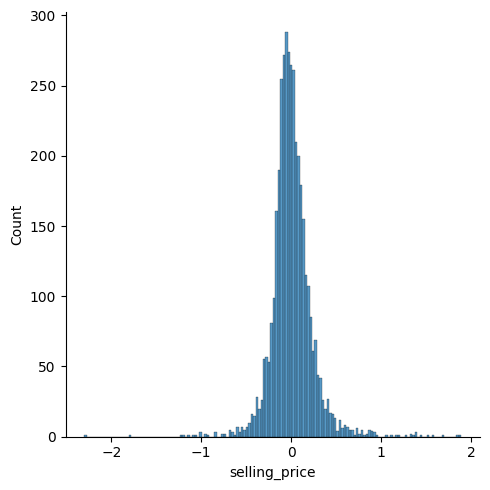

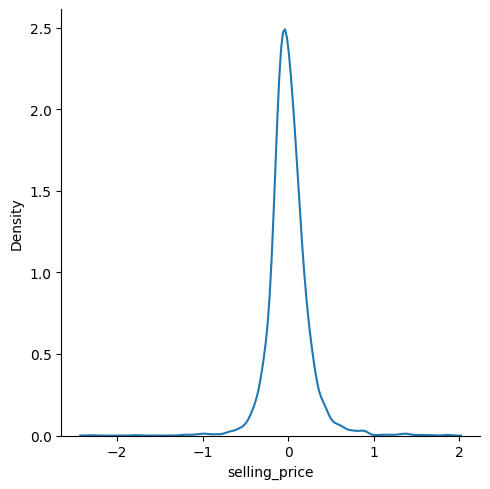

In [13]:
y_hat = model_mlr.predict(x_test)
error = y_test - y_hat
sns.displot(error); sns.displot(error, kind = 'kde')

In [10]:
np.mean(error)

0.005699795987965588

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)  #1\n sum(y-y^)**2

0.054180618085069104